# Minicurso Classificadores

## Lição 4: Redução de dimensionalidade e Pipelines...

### Reconhecendo números de 0 a 9 escritos a mão

#### Importando dependências e setup

In [1]:
# Import datasets, and ML algorithms
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Import Numeric library
import numpy as np

# Import plotting library
import matplotlib.pyplot as plt

# Set plot to be show inside the notebook
%matplotlib inline

In [2]:
# Set the random seed to reproducibility
import random
random.seed(0)

#### Preparando os dados

In [3]:
digits = datasets.load_digits()
n_samples = len(digits.images)

X = digits.images.reshape((n_samples, -1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
n_samples, n_dim = X.shape
n_samples, n_dim

(1797, 64)

In [5]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

#### Engenharia de Requisitos

In [6]:
pca = PCA(n_components=3)
Score = pca.fit_transform(X)

ex_var_ratio = pca.explained_variance_ratio_*100
ex_var_ratio = list(map(int, map(round, ex_var_ratio)))

pc1 = Score.reshape((n_samples, -2))[:,0]
pc2 = Score.reshape((n_samples, -2))[:,1]
pc3 = Score.reshape((n_samples, -2))[:,2]

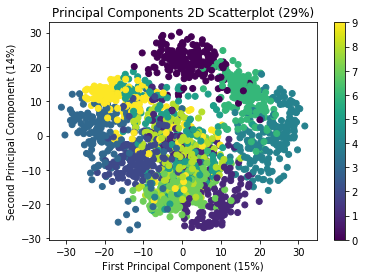

In [7]:
plt.scatter(pc1, pc2, c=y);

plt.colorbar();
plt.xlabel('First Principal Component ({}%)'.format(ex_var_ratio[0]));
plt.ylabel('Second Principal Component ({}%)'.format(ex_var_ratio[1]));
plt.title('Principal Components 2D Scatterplot ({}%)'.format(sum(ex_var_ratio[0:2])));

##### Elbow Method: o Cotovelo da Curva

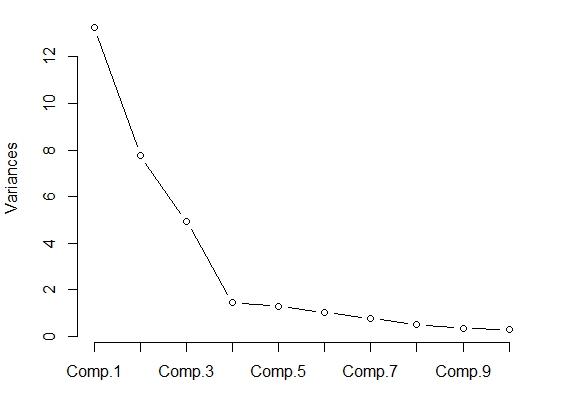
*(Imagem obtida em: https://www.r-bloggers.com/pca-and-k-means-clustering-of-delta-aircraft/)*

In [8]:
# Allow interactive plots
%matplotlib notebook
%matplotlib widget

<IPython.core.display.Javascript object>


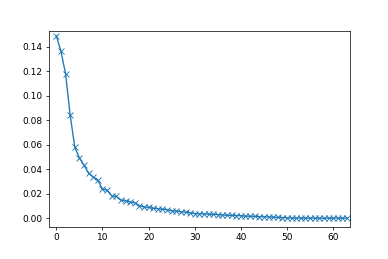

In [9]:
pca = PCA() # Same as: PCA(n_components = n_dim)
Score = pca.fit_transform(X)

plt.plot(pca.explained_variance_ratio_,'-x');

In [10]:
# Close interactive plot
plt.close()

# Disable interactive plot reseting plot to be show inside the notebook (statically)
%matplotlib inline

#### Montando um modelo usando uma pipeline de algoritmos

In [11]:
model = Pipeline([
    ('pca', PCA()),
    ('clf', SVC(gamma='scale')),
])
model

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

##### Utilizando o modelo

In [12]:
scores = cross_validate(model, X, y, cv = 3, return_train_score = False, scoring=('accuracy', 'f1_macro')) 
scores

{'fit_time': array([0.29478335, 0.28179169, 0.29679036]),
 'score_time': array([0.12333012, 0.13030362, 0.12834048]),
 'test_accuracy': array([0.91860465, 0.94323873, 0.94127517]),
 'test_f1_macro': array([0.92495649, 0.94498881, 0.94330396])}

##### Trainando, Validando e Testando a Pipeline

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


Treino, Tuning e Validação

In [14]:
parameters = {'pca__n_components': list(range(1, n_dim//2)),
              'clf__C': (1, 10)
             }

gs_clf = GridSearchCV(model, parameters, cv = 3)
gs_clf.fit(X_train, y_train)
gs_clf.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [15]:
gs_clf.score(X_train, y_train)

1.0

Teste: Predição e Avaliação

In [16]:
gs_clf.predict(X_test)

array([0, 5, 7, 6, 0, 7, 8, 5, 9, 4, 2, 6, 2, 8, 0, 3, 8, 1, 9, 4, 6, 5,
       9, 1, 3, 6, 2, 9, 8, 4, 8, 0, 6, 3, 7, 6, 2, 3, 7, 6, 7, 2, 9, 7,
       6, 6, 0, 2, 0, 2, 3, 2, 9, 2, 4, 1, 8, 6, 7, 2, 0, 1, 9, 7, 7, 4,
       1, 9, 7, 3, 8, 8, 8, 5, 5, 8, 8, 0, 5, 8, 1, 9, 1, 0, 3, 3, 6, 1,
       5, 5, 1, 7, 8, 8, 4, 7, 6, 6, 5, 7, 0, 3, 0, 2, 9, 6, 5, 0, 1, 2,
       1, 5, 4, 4, 7, 2, 1, 3, 2, 3, 7, 5, 2, 0, 0, 6, 6, 6, 1, 8, 4, 8,
       1, 6, 9, 9, 0, 6, 3, 9, 4, 8, 4, 3, 8, 3, 7, 8, 9, 8, 0, 4, 8, 1,
       2, 1, 0, 2, 5, 6, 9, 1, 0, 2, 1, 5, 6, 8, 9, 6, 0, 9, 3, 4, 3, 5,
       8, 9, 3, 7, 5, 4, 7, 2, 1, 8, 8, 4, 0, 9, 4, 7, 5, 3, 2, 0, 3, 8,
       8, 7, 5, 2, 2, 0, 5, 5, 9, 7, 8, 0, 5, 1, 4, 5, 8, 7, 6, 4, 1, 2,
       0, 7, 9, 2, 4, 4, 1, 7, 1, 4, 3, 6, 4, 4, 9, 9, 5, 6, 3, 0, 1, 4,
       3, 9, 1, 6, 8, 1, 1, 8, 6, 6, 5, 9, 4, 0, 5, 8, 6, 5, 0, 0, 8, 8,
       2, 9, 2, 9, 0, 2, 7, 2, 2, 1, 3, 1, 1, 2, 2, 6, 4, 3, 2, 4, 9, 0,
       5, 8, 5, 7, 1, 7, 4, 4, 2, 3, 4, 9, 5, 8, 4,

In [17]:
gs_clf.score(X_test, y_test)

0.9722222222222222

---

### Para saber mais...

Dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

Outros datasets para treinar:
https://scikit-learn.org/stable/datasets/index.html

Tutorial que usei de base para esta lição:
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

### Dicas de execução

Uma forma bem simples de executar este Notebook é usando o Google Colab: https://colab.research.google.com/

Se for utilizar sua máquina, lembre de intalar o Python 3 (eu usei o 3.7) e as dependências:
- NumPy
- Scikit-learn
- Jupyter Notebook
- Matplotlib

Sugiro instalar tanto o python quanto as dependências via [Anaconda](https://www.anaconda.com/distribution/#download-section) (ou [MiniConda](https://conda.io/en/latest/miniconda.html)) criando um Environment.